## Accessing area-level annotations

#### Required imports and setting up connections

In [1]:
# Intern allows us to access boss resources https://docs.theboss.io/docs/getting-started-intern
# You do not need to modify this cell, it will connect to the bossdb for you. 

from intern.remote.boss import BossRemote
from intern.resource.boss.resource import *
import numpy as np
import configparser
import matplotlib.pyplot as plt

# Setup and connection parameters

connection_params={
    'protocol':'https',
    'host':'api.bossdb.io',
    'token':'public' #allows read access to the general public
}

# Dataset dimensions are z:[0,720], y:[0,1420], x:[0,5805]
# Data beyond these ranges will be padded with 0 values
#BossDB access uses an [inclusive_index,exclusive_index] format, so [0,10] specifies 10 index values 0-9

data_params={
    'prasad_coll':'prasad',
    'prasad_exp' : 'prasad2020',
    'prasad_channel' : 'image',
    'pixel_annotation_channel': 'pixel_annotation',
    'roi_channel': 'region_of_interest',
    'roi_interp_channel': 'roi_interpolated',
    'prasad_coord' : 'prasad_prasad2020',
    'prasad_res' : 0, #Native resolution of dataset is 1.17um, 1.17um, 1.17um per voxel=
}

#create connection objects

rmt = BossRemote(connection_params)
chan_pixel = ChannelResource(data_params['pixel_annotation_channel'], data_params['prasad_coll'], data_params['prasad_exp'],
                             'annotation', datatype='uint64', sources=data_params['prasad_channel'])
chan_roi = ChannelResource(data_params['roi_channel'], data_params['prasad_coll'], data_params['prasad_exp'],
                             'annotation', datatype='uint64', sources=data_params['prasad_channel'])
chan_roi_interp = ChannelResource(data_params['roi_interp_channel'], data_params['prasad_coll'], data_params['prasad_exp'],
                             'annotation', datatype='uint64', sources=data_params['prasad_channel'])

#### Select z-slice to download area-level annotations for

Labels:<br>
0 = Clear<br>
1 = Cortex<br>
2 = Striatum<br>
3 = TRN<br>
4 = Ventral Posterior (VP)<br>
5 = Zona Incerta (ZI)<br>
6 = Internal Capsule (IC)<br>
7 = Hypothalamus<br>
8 = Corpus Callosum<br>

(1, 1420, 5805)
8
0


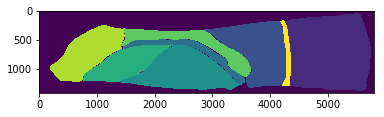

In [3]:
#Manually annotated Regions of Interest (ROI)
#Several z slices were manually annotated to indicate Regions of interest

#The following z slices were hand annotated
z_vals = [109,159,209,259,309,359,409,410,460]
xrange = [0,5805]
yrange = [0,1420]

#select your favorite z slice (in this case, 259)

zrange = [259,260] #selects a single slice, bossDB indexes [inclusive,exclusive]

#Get the ROI Annotation from bossDB

roi_cutout_data = rmt.get_cutout(chan_roi, data_params['prasad_res'], xrange,
                                 yrange, zrange)

print(roi_cutout_data.shape) #Data are Z,Y,X
print(np.max(roi_cutout_data))
print(np.min(roi_cutout_data))
plt.imshow(np.squeeze(roi_cutout_data[0,:,:]/8.0))

#### Download area-level annotations for multiple slices

Warning!!! - This downloads a large chunk of data and may take a while

(1, 1420, 5805)
8
0


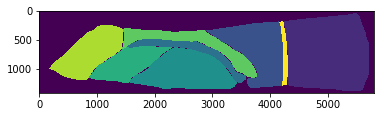

In [4]:
#The z slices that were manually annotated (and are numbered in the cell above) were interpolated across a range of z slices

xrange = [0,5805]
yrange = [0,1420]

#The valid z values for the interpolation are z=117 to 460

zrange = [117,461] #selects a single slice, bossDB indexes [inclusive,exclusive], so add 1 to final index

#Get the ROI Annotation from bossDB

roi_interp_cutout_data = rmt.get_cutout(chan_roi_interp, data_params['prasad_res'], xrange,
                                 yrange, zrange)

print(roi_cutout_data.shape) #Data are Z,Y,X
print(np.max(roi_cutout_data))
print(np.min(roi_cutout_data))
plt.imshow(np.squeeze(roi_interp_cutout_data[48,:,:]/8.0))